In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
RANDOM_STATE = 42

In [ ]:
data = pd.read_csv("breast_cancer_survival.csv")
data.head()

In [ ]:
from sklearn.model_selection import train_test_split
column_name_mapping={'ER status':'ERstatus','PR status':'PRstatus','HER2 status':'HER2status'}
data.rename(columns=column_name_mapping,inplace=True)

data.Patient_Status[data.Patient_Status == 'Dead'] = 0

data.Patient_Status[data.Patient_Status == 'Alive'] = 1

data.ERstatus[data.ERstatus == 'Positive'] = 1

data.ERstatus[data.ERstatus == 'Negative'] = 0

data.PRstatus[data.PRstatus == 'Positive'] = 1

data.PRstatus[data.PRstatus == 'Negative'] = 0

data.HER2status[data.HER2status == 'Positive'] = 1

data.HER2status[data.HER2status == 'Negative'] = 0

data.Tumour_Stage[data.Tumour_Stage == 'II'] = 2

data.Tumour_Stage[data.Tumour_Stage == 'I'] = 1

data.Tumour_Stage[data.Tumour_Stage == 'III'] = 3

data.Surgery_type[data.Surgery_type == 'Other'] = 1

data.Surgery_type [data.Surgery_type == 'Lumpectomy'] = 2
data.Surgery_type[data.Surgery_type == 'Modified Radical Mastectomy'] = 3

data.Surgery_type[data.Surgery_type == 'Simple Mastectomy'] = 4

data = data.dropna()
print(data)

In [34]:
from sklearn.model_selection import train_test_split
x= data.drop(columns = ['Date_of_Surgery', 'Date_of_Last_Visit', 'Histology', "Gender", 'ERstatus', 'PRstatus'])
y = data['Patient_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=RANDOM_STATE)
print(y_train.value_counts())
print(y_test.value_counts())


1    192
0     45
Name: Patient_Status, dtype: int64
1    63
0    17
Name: Patient_Status, dtype: int64


In [35]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [38]:
from sklearn.neighbors import KNeighborsClassifier

def knn_model_fitting(x_train, x_test, y_train, y_test, n_neighbors):

    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)

    preds = knn.predict(x_test)
    score = knn.score(x_test, y_test)
    print('The mean accuracy of this KNN classifier is: {}'.format(score))

    return preds, knn
# here just set the # of neighbors =1 to see the model performance
n_neighbors= 1
preds_default, knn_default = knn_model_fitting(x_train, x_test, y_train, y_test, n_neighbors)

The mean accuracy of this KNN classifier is: 0.7625


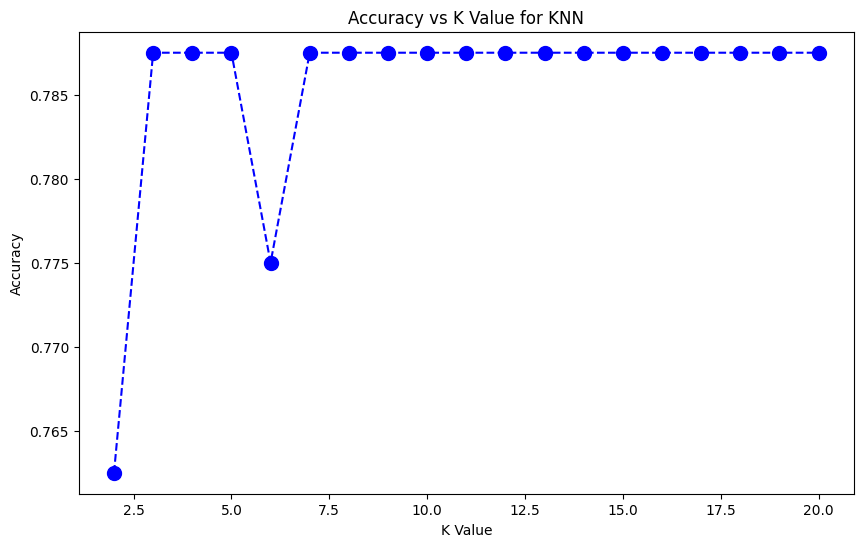

In [39]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list to store the accuracies for different K values
accuracies = []

# Loop through different K values from 2 to 20
for k in range(2, 21):
    # Initialize and fit the KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = knn.predict(x_test)

    # Calculate the accuracy for the current K value
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the list
    accuracies.append(accuracy)

# Plot the accuracy vs K graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), accuracies, color="blue", linestyle="--", marker="o", markersize=10)

# Set labels and title
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value for KNN")

# Display the plot
plt.show()

In [28]:
data = pd.read_csv("Japan_life_expectancy.csv")
data.head()

,Prefecture,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
0,Aichi,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
1,Akita,83.79,242.6,11.3,11.9,34.0,1.7,404.6,1105.5,173.0,...,10.6,70.3,2697.0,296.8,5.2,1168.5,9.0,3.24,17.93,13.50
2,Aomori,82.80,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,...,11.8,63.6,2507.0,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
3,Chiba,84.48,205.8,14.7,24.9,16.1,0.5,195.8,749.1,173.5,...,5.5,30.1,3116.0,1778.4,4.1,806.2,4.2,3.53,25.44,18.24
4,Ehime,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60


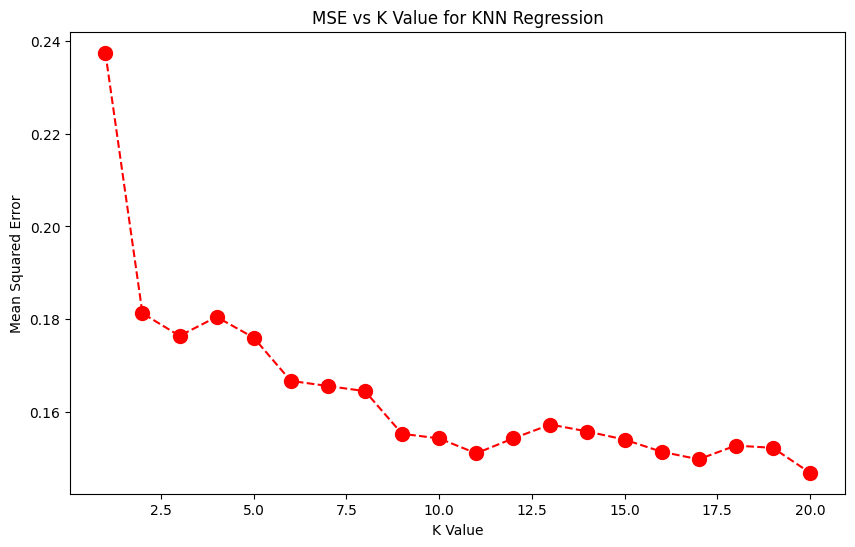

In [29]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define a list to store the MSE values for different K values
mse_values = []

# Loop through different K values from 1 to 20
for k in range(1, 21):
    # Initialize and fit the KNN regressor with the current K value
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict target values for the test data
    y_pred = knn.predict(x_test)

    # Calculate the mean squared error for the current K value
    mse = mean_squared_error(y_test, y_pred)

    # Append the MSE to the list
    mse_values.append(mse)

# Plot the MSE vs K graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), mse_values, color="red", linestyle="--", marker="o", markersize=10)

# Set labels and title
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs K Value for KNN Regression")

# Display the plot
plt.show()